<a href="https://colab.research.google.com/github/JithmiS/ml_7_assignment/blob/master/ENSEMBLE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [92]:
train_csv = pd.read_csv('/content/train.csv', parse_dates = ['pickup_time','drop_time']).drop(columns='tripid')

In [91]:
test = pd.read_csv('/content/test.csv', parse_dates = ['pickup_time','drop_time'])

In [93]:
train_csv['fare'] = train_csv.fare.fillna(train_csv.fare.mean())
train_csv['additional_fare'] = train_csv.additional_fare.fillna(train_csv.additional_fare.mean())
train_csv['duration'] = train_csv.duration.fillna(train_csv.duration.mean())
train_csv['meter_waiting_till_pickup'] = train_csv.meter_waiting_till_pickup.fillna(train_csv.meter_waiting_till_pickup.mean())
train_csv['meter_waiting'] = train_csv.meter_waiting.fillna(train_csv.meter_waiting.mean())
train_csv['meter_waiting_fare'] = train_csv.meter_waiting_fare.fillna(train_csv.meter_waiting_fare.mean())

In [94]:
# Absolute difference time
train_csv['abs_time'] = (train_csv['drop_time'] - train_csv['pickup_time']).abs()
test['abs_time'] = (test['drop_time'] - test['pickup_time']).abs()

In [95]:
#Absolute difference in latitude and longitude
train_csv['abs_lat_diff'] = (train_csv['drop_lat'] - train_csv['pick_lat']).abs()
train_csv['abs_lon_diff'] = (train_csv['drop_lon'] - train_csv['pick_lon']).abs()

In [96]:
train_csv['label'] = train_csv['label'].map({'correct':1,'incorrect':0})

In [97]:
train_csv = train_csv.drop(['pickup_time', 'drop_time', 'pick_lat','pick_lon', 'drop_lat', 'drop_lon'], axis=1)

In [98]:
# Create absolute differences
test['abs_lat_diff'] = (test['drop_lat'] - test['pick_lat']).abs()
test['abs_lon_diff'] = (test['drop_lon'] - test['pick_lon']).abs()

In [99]:
# Save the id for submission
test_id = list(test.pop('tripid'))

In [100]:
test = test.drop(['pickup_time', 'drop_time', 'pick_lat','pick_lon', 'drop_lat', 'drop_lon'], axis=1)
train_csv['time'] = (train_csv['abs_time'].dt.seconds.astype(int))
test['time'] = (test['abs_time'].dt.seconds.astype(int))
train_csv['distance'] = ((((train_csv['abs_lat_diff'])**2 + (train_csv['abs_lon_diff'])**2)**0.5)).abs()
test['distance'] = ((((test['abs_lat_diff'])**2 + (test['abs_lon_diff'])**2)**0.5)).abs()
train_csv = train_csv.drop(['abs_lat_diff','abs_lon_diff'], axis=1)
test = test.drop(['abs_lat_diff','abs_lon_diff'], axis=1)

In [101]:
train_csv = train_csv.drop(['abs_time'], axis=1)
test = test.drop(['abs_time'], axis=1)

In [102]:
train_csv = train_csv.drop(['meter_waiting_till_pickup'], axis=1)
test = test.drop(['meter_waiting_till_pickup'], axis=1)

In [30]:
#predictors = train_csv.drop(['label'], axis=1)
#target = train_csv['label']

#X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [31]:
#X_train

In [45]:
X_1 = train_csv.drop(['label'], axis=1)
y_1 = train_csv['label']

X_train1,X_test1,y_train1,y_test1=train_test_split(X_1,y_1,random_state=10)
print(y_train1.value_counts())
print(y_test1.value_counts())

1    11608
0     1274
Name: label, dtype: int64
1    3887
0     407
Name: label, dtype: int64


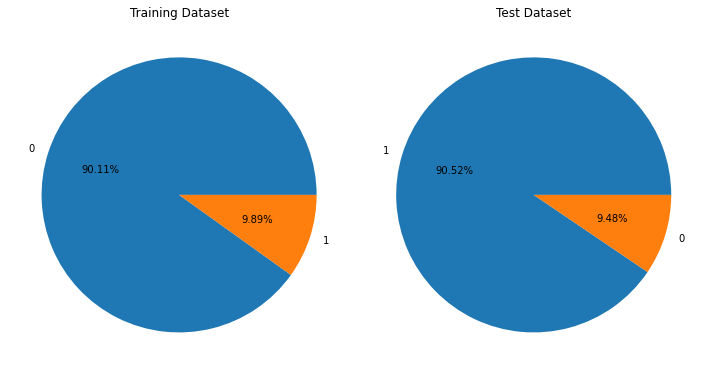

In [46]:
plt.figure(figsize=(10,15))

plt.subplot('121')
plt.pie(y_train1.value_counts(),labels=y_train1.unique(),autopct = '%1.2f%%')
plt.title('Training Dataset')

plt.subplot('122')
plt.pie(y_test1.value_counts(),labels=y_test1.unique(),autopct = '%1.2f%%')
plt.title('Test Dataset')

plt.tight_layout()

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit 

X = train_csv.drop(['label'], axis=1)
y = train_csv['label']

splitter=StratifiedShuffleSplit(n_splits=1,random_state=12)

for train,test in splitter.split(X,y):     #this will splits the index
    X_train = X.iloc[train]
    Y_train = y.iloc[train]
    X_test = X.iloc[test]
    Y_test = y.iloc[test]
print(Y_train.value_counts())  
print(Y_test.value_counts())

1    13945
0     1513
Name: label, dtype: int64
1    1550
0     168
Name: label, dtype: int64


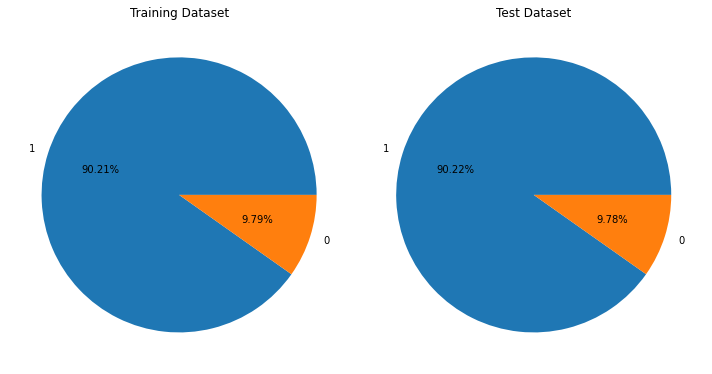

In [42]:
plt.figure(figsize=(10,15))

plt.subplot('121')
plt.pie(Y_train.value_counts(),labels=Y_train.unique(),autopct = '%1.2f%%')
plt.title('Training Dataset')

plt.subplot('122')
plt.pie(Y_test.value_counts(),labels=Y_test.unique(),autopct = '%1.2f%%')
plt.title('Test Dataset')

plt.tight_layout()

In [50]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

# Models

In [63]:
# Classification Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Performance Measures
from sklearn.metrics import accuracy_score

# Global Variables
rnd_state = 42
skfold = StratifiedKFold(n_splits=5)

XGBoost Classifier (Stratified K-Fold cross validation)

Best: -0.149372 using {'n_estimators': 360}
-0.161177 (0.003242) with: {'n_estimators': 100}
-0.157695 (0.003619) with: {'n_estimators': 120}
-0.155564 (0.003366) with: {'n_estimators': 140}
-0.153627 (0.003615) with: {'n_estimators': 160}
-0.152719 (0.003468) with: {'n_estimators': 180}
-0.151632 (0.003556) with: {'n_estimators': 200}
-0.150900 (0.003312) with: {'n_estimators': 220}
-0.150363 (0.003497) with: {'n_estimators': 240}
-0.150012 (0.003735) with: {'n_estimators': 260}
-0.149939 (0.003735) with: {'n_estimators': 280}
-0.149832 (0.003989) with: {'n_estimators': 300}
-0.149646 (0.004282) with: {'n_estimators': 320}
-0.149535 (0.004292) with: {'n_estimators': 340}
-0.149372 (0.004348) with: {'n_estimators': 360}
-0.149394 (0.004255) with: {'n_estimators': 380}


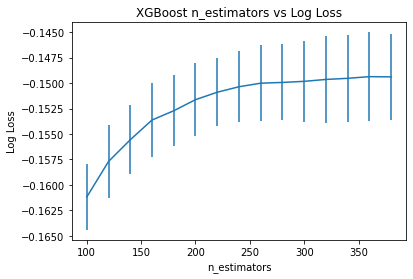

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model = XGBClassifier(learning_rate =0.1, 
 n_estimators=340, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27)

n_estimators = range(100,400, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train,Y_train)

XGBest = grid_search.best_estimator_

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
 
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

Hyperparameter tuning

In [54]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 7.17274966,  7.57990117,  7.61784201, 12.17629681, 11.79960337,
         11.65318565, 17.21173644, 16.33741584, 15.55216155, 21.81792617,
         20.00987015, 16.14267735]),
  'mean_score_time': array([0.1164227 , 0.09331036, 0.09966674, 0.1397994 , 0.14728146,
         0.14670134, 0.22601976, 0.2190053 , 0.197299  , 0.26107335,
         0.2281909 , 0.18611822]),
  'mean_test_score': array([0.93082526, 0.93196183, 0.93159819, 0.9307031 , 0.93042848,
         0.92997395, 0.92646468, 0.92740038, 0.92689362, 0.9271663 ,
         0.92599891, 0.92658572]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, Fa

In [61]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,12)],
 'colsample_bytree':[i/10.0 for i in range(6,12)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.11, 
 n_estimators=360, max_depth=3,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27), 

 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


gsearch3.fit(X_train,Y_train)
xgb_clf = gsearch3.best_estimator_

gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([ 7.21735754,  7.08107138,  7.00083795,  7.0198554 ,  6.58344197,
          0.03273931,  7.24438567,  7.17336173,  7.03449001,  6.92917614,
          6.65549965,  0.02111664,  7.30126572,  7.23547153,  7.05032597,
          6.92733188,  6.53363023,  0.02722669,  7.35663619,  7.16557164,
          6.94144406,  7.04809885,  6.671311  ,  0.02562137,  7.17070637,
          7.16741986,  7.13835258,  6.91885157,  6.55919938,  0.02984929,
          7.2616159 ,  7.20362864,  7.05751991,  6.91036496,  6.6742259 ,
          0.05523515,  7.23142357,  7.24810886,  7.01389503,  7.05639305,
          6.46787238,  0.04022226,  7.36317401,  7.25705795,  6.98821511,
          7.79635496,  9.17905993,  0.03050723,  7.28786969,  7.157897  ,
          7.13216567,  6.93603902,  6.5985199 ,  0.01419244,  7.21159587,
          7.28516083,  7.02086978,  6.99416862,  6.52462964,  0.04200983,
          7.81565256,  7.85531268,  7.59206138,  7.6240624 ,  7.16510577,
          0.01869459,

Random Forest Classifier

In [64]:
forest_clf = RandomForestClassifier(random_state=rnd_state, n_estimators=200)
forest_clf.fit (X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [65]:
param_grid = [
    
    {
      'n_estimators': range(200,400, 20)
    },
   ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_forest_clf = GridSearchCV(forest_clf, param_grid, cv=skfold,
                           scoring='accuracy', return_train_score=True)

grid_forest_clf.fit(X_train, Y_train)
rfc_clf = grid_forest_clf.best_estimator_

print(grid_forest_clf.best_score_)


0.9527748841417912


NameError: ignored

In [66]:
rfc_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr_c=LogisticRegression( C=1, class_weight={0:0.62, 1:0.38}, max_iter=5000,
                     penalty='l2',
                   random_state=None, solver='lbfgs', verbose=0,
                   warm_start=True)
lr_c.fit(X_train,Y_train.ravel())
lr_pred=lr_c.predict(X_test)
lr_ac=accuracy_score(Y_test.ravel(), lr_pred)
print('LogisticRegression_accuracy test:',lr_ac)
print("AUC",roc_auc_score(Y_test.ravel(), lr_pred))

LogisticRegression_accuracy test: 0.9150174621653085
AUC 0.5946658986175115


In [71]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

cv = StratifiedShuffleSplit(n_splits = 15, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

x = scaler.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear',class_weight={0:0.9, 1:0.1}), X,y, cv  = cv)
print ("CV accuracy on 15 chunks: {}".format(accuracies))
print ("Mean CV accuracy: {}".format(round(accuracies.mean(),5)))

CV accuracy on 15 chunks: [0.78574755 0.77666511 0.77782953 0.80391244 0.77061015 0.7906381
 0.76781556 0.78993945 0.78178854 0.78341872 0.78551467 0.79226828
 0.77596646 0.7782953  0.77992548]
Mean CV accuracy: 0.78269


Adaboost Classifier

In [72]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(random_state=rnd_state, max_depth=2),
    random_state = rnd_state)

param_grid = {
              "n_estimators" :range(200,400, 20),
              "learning_rate":  [0.05, 0.1, 0.5]}

grid_ada_clf = GridSearchCV(ada_clf, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_ada_clf.fit(X_train, Y_train)
grid_ada_clf.best_params_

ada_clf = grid_ada_clf.best_estimator_

ada_pred = grid_ada_clf.predict(X_test).astype(int)
grid_ada_scores = (grid_ada_clf.best_score_ + accuracy_score (ada_pred, Y_test))/2
grid_ada_scores

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.5min finished


0.9482207542143051

Using voting Classifier

In [73]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('ada_classifier',ada_clf),
    ('XGB_Classifier', xgb_clf),
    ('random_forest_Classifier', rfc_clf)
],voting='hard')

voting_classifier = voting_classifier.fit(X_train,Y_train.ravel())

In [74]:
vote_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(vote_pred, Y_test.ravel()), 4)
print('Voting accuracy of the combined classifiers: ',voting_accy)
print('AUC: ',round(roc_auc_score(Y_test.ravel(), vote_pred), 4))

Voting accuracy of the combined classifiers:  0.9499
AUC:  0.7732


In [75]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, vote_pred))

              precision    recall  f1-score   support

           0       0.89      0.55      0.68       168
           1       0.95      0.99      0.97      1550

    accuracy                           0.95      1718
   macro avg       0.92      0.77      0.83      1718
weighted avg       0.95      0.95      0.94      1718



In [105]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
test_set = feature_scaler.fit_transform(test)

In [106]:
final_pred = voting_classifier.predict(test_set)

In [107]:
final_pred

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
test_csv_2 = pd.read_csv('/content/test.csv')
summission = pd.concat([test_csv_2['tripid'], pd.DataFrame(final_pred)], axis=1)
summission.columns = ['tripid', 'prediction']
summission.to_csv('submission_emsemble.csv', encoding='utf-8', index = False)